In [48]:
import pandas as pd
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

df_P0_1k = pd.read_hdf("zwei_populationen.h5", key="P_0_1000")
df_P0_10k = pd.read_hdf("zwei_populationen.h5", key="P_0_10000")
df_P1 = pd.read_hdf("zwei_populationen.h5", key="P_1")

In [49]:
P0_1k = df_P0_10k.values
P0_10k = df_P0_1k.values
P1 = df_P1.values

muP0 = np.array([np.mean(P0_10k, axis=0)])
muP1 = np.array([np.mean(P1, axis=0)])

In [50]:
covP0 = np.cov(P0_10k, ddof = 1, rowvar=False)
covP1 = np.cov(P1, ddof = 1, rowvar=False)
# is this the combined covariance matrix
covCombined = covP0 + covP1
covCombinedInv = linalg.inv(covCombined)
print(covCombinedInv)
print(muP0)
lambdaStar = np.dot(covCombinedInv, np.transpose(muP0-muP1))
print(lambdaStar)
#eigvals = linalg.eigvals(matrix)
#eigvectors = linalg.eig(a, left=False, right=True)[1] # normalized right eigenvector

[[ 0.20956093 -0.26669325]
 [-0.26669325  0.42113085]]
[[-0.09576791  2.8788468 ]]
[[-1.21953973]
 [ 1.53514938]]


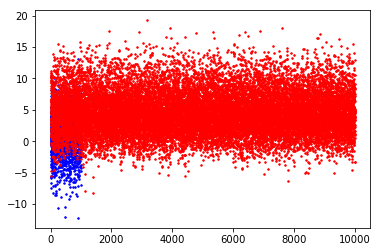

In [52]:
plt.plot(P0_10k, 'b.', label='P0', markersize=3)
plt.plot(P1, 'r.', label='P1', markersize=3)
plt.show()